In [1]:
import numpy as np
import pandas as pd

import math
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Feature Scalling libraries
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [23]:
# Configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [2]:
path = 'dados-churn.csv'

In [3]:
df = pd.read_csv(path, index_col=[0])

In [4]:
df.head()

,ClienteID,Nome,Score,Localizacao,Genero,Idade,TempoCliente,Saldo,Produtos,TemCartao,UsuarioAtivo,Salario,Churn
Id,,,,,,,,,,,,,
1,14476292,MARIA,619,Fortaleza,Feminino,42,2,0.00,1,1,1,101348.88,1
2,19023634,ANA,608,Natal,Feminino,41,1,83807.86,1,0,1,112542.58,0
3,19878769,FRANCISCA,502,Fortaleza,Feminino,42,8,159660.80,3,1,0,113931.57,1
4,14995009,ANTONIA,699,Fortaleza,Feminino,39,1,0.00,2,0,0,93826.63,0
5,14430963,ADRIANA,850,Natal,Feminino,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.columns

Index(['ClienteID', 'Nome', 'Score', 'Localizacao', 'Genero', 'Idade',
       'TempoCliente', 'Saldo', 'Produtos', 'TemCartao', 'UsuarioAtivo',
       'Salario', 'Churn'],
      dtype='object')

In [9]:
df.dtypes

ClienteID         int64
Nome             object
Score             int64
Localizacao      object
Genero           object
Idade             int64
TempoCliente      int64
Saldo           float64
Produtos          int64
TemCartao         int64
UsuarioAtivo      int64
Salario         float64
Churn             int64
dtype: object

In [45]:
# Colunas categóricas
cats = ['Localizacao','Genero']
#colunas numericas
nums = ['Score', 'Idade','TempoCliente','Saldo','Produtos','Salario']

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ClienteID     10000 non-null  int64  
 1   Nome          10000 non-null  object 
 2   Score         10000 non-null  int64  
 3   Localizacao   10000 non-null  object 
 4   Genero        10000 non-null  object 
 5   Idade         10000 non-null  int64  
 6   TempoCliente  10000 non-null  int64  
 7   Saldo         10000 non-null  float64
 8   Produtos      10000 non-null  int64  
 9   TemCartao     10000 non-null  int64  
 10  UsuarioAtivo  10000 non-null  int64  
 11  Salario       10000 non-null  float64
 12  Churn         10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.3+ MB


O dataset não contém valores nulos

#### Explorando as variáveis númericas

In [48]:
df[nums].describe()

,Score,Idade,TempoCliente,Saldo,Produtos,Salario
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


As colunas <code> Score, Salario </code> e <code>TempoCliente</code> provavelmente tem uma distribuição simétrica (média e mediana não são muito diferentes).

A coluna <code>Saldo</code> provavelmente tem uma distribuição mais inclinada para a esquerda (média menor do que a mediana)

#### Explorando variáveis categóricas

In [49]:
df[cats].describe()

,Localizacao,Genero
count,10000,10000
unique,3,2
top,Fortaleza,Masculino
freq,5014,5457


* Para a variável <code>Localizacao</code> Fortaleza é a classe dominante
* Para a variável <code>Genero</code> Masculino é a classe dominante

In [18]:
# Verificando duplicados
duplicateRows = df[df.duplicated()]
duplicateRows

,ClienteID,Nome,Score,Localizacao,Genero,Idade,TempoCliente,Saldo,Produtos,TemCartao,UsuarioAtivo,Salario,Churn
Id,,,,,,,,,,,,,


#### Análise Univariada

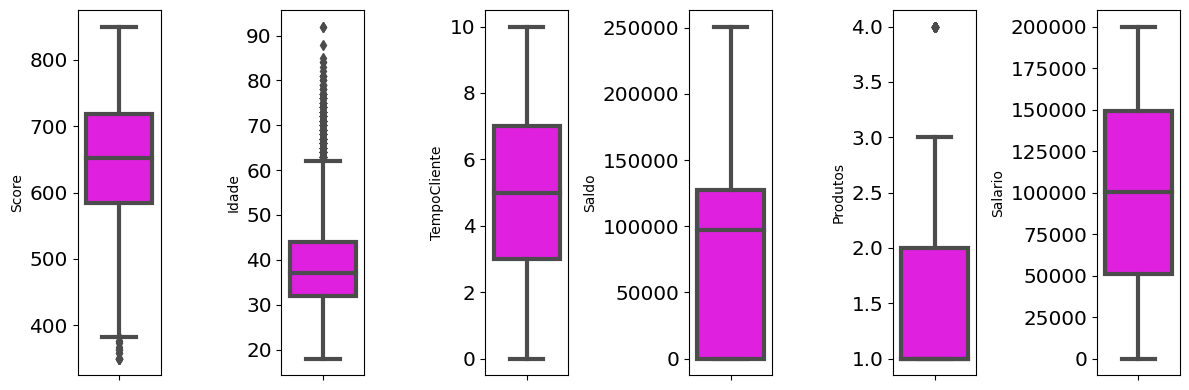

In [24]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1,len(features),i + 1)
    sns.boxplot(y=df[features[i]], color = 'magenta', orient='v')
    plt.tight_layout()

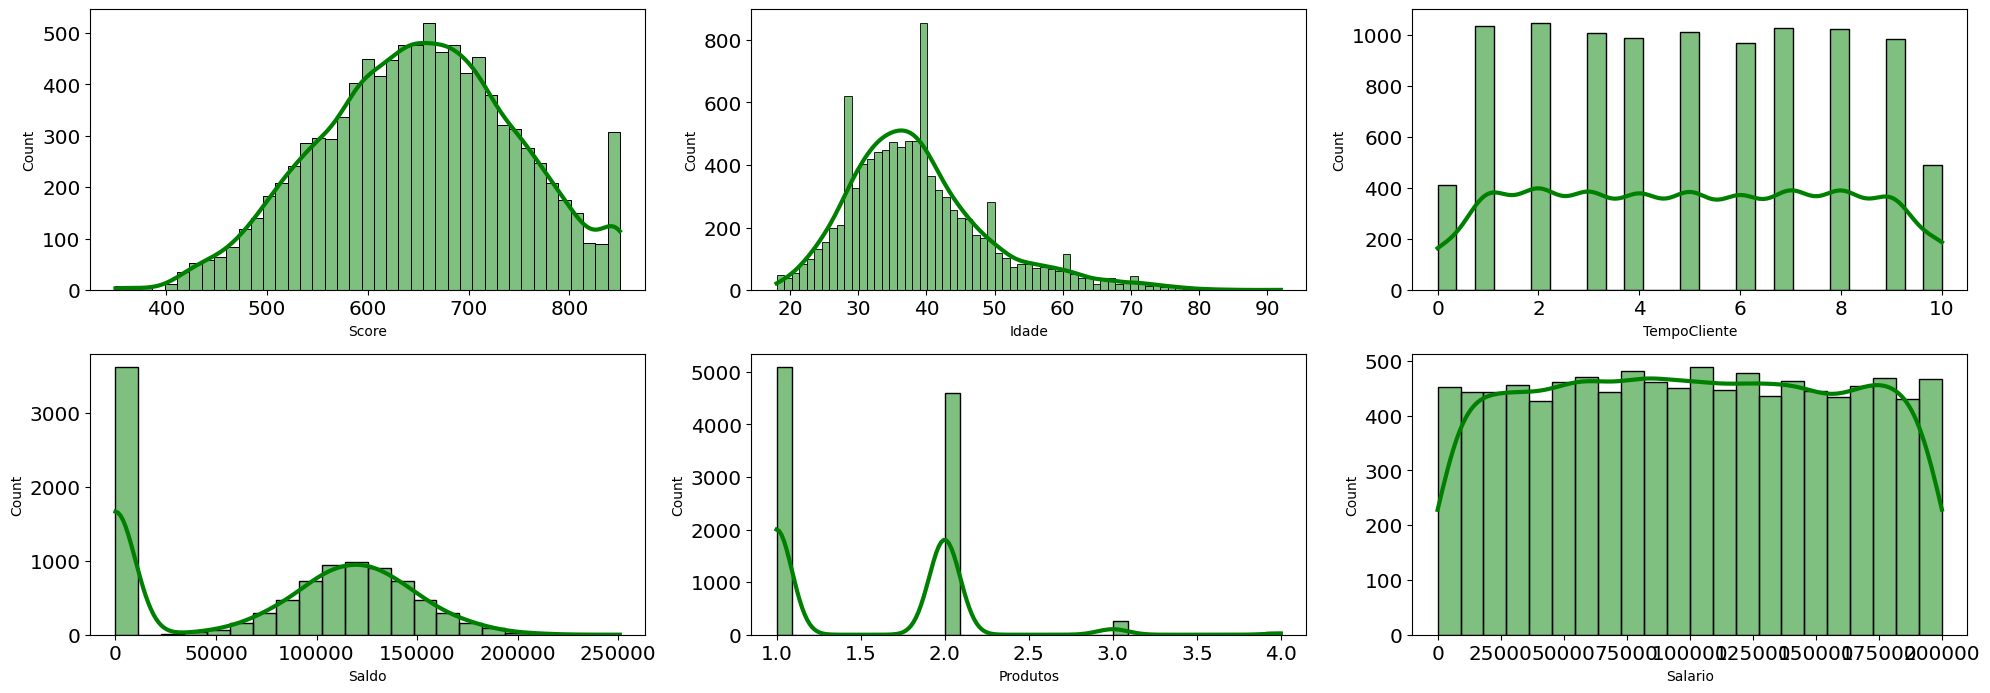

In [41]:
features = nums
plt.figure(figsize = (20,10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)//2, i+1)
    sns.histplot(x=df[features[i]], kde=True, color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

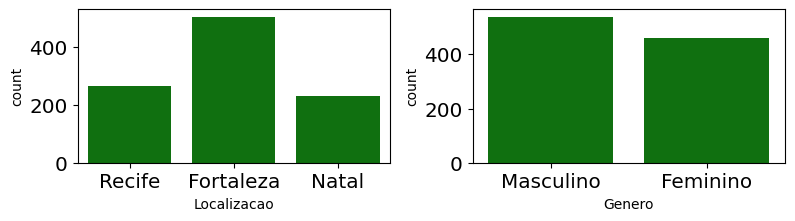

In [46]:
df_sample =  df.sample(1000,random_state=42)
for i in range(0, len(cats)):
    plt.subplot(2, 3 , i+1)
    sns.countplot(x=df_sample[cats[i]], color = 'green', orient='v')
    plt.tight_layout()

#### Análise Bivariada

In [50]:
df_corr = df[nums].corr()

<AxesSubplot:>

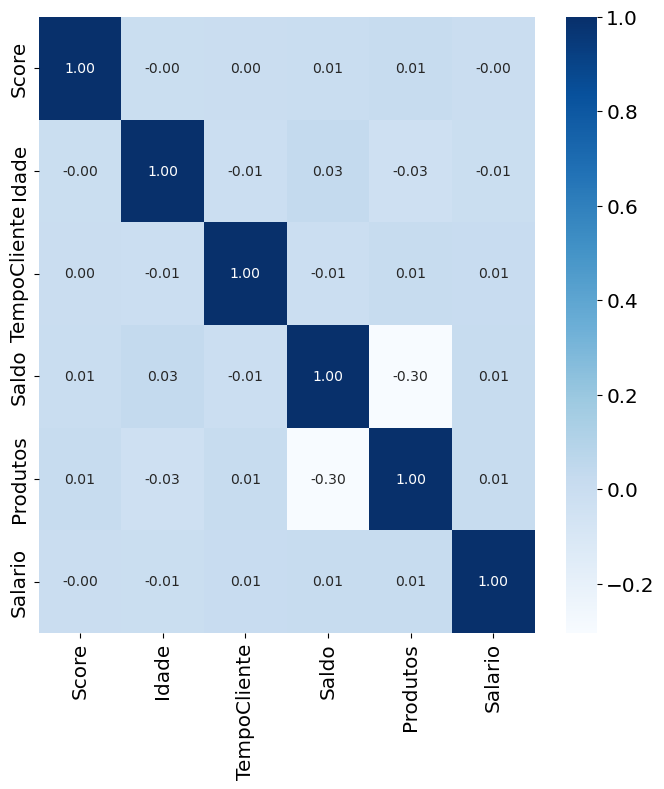

In [51]:
plt.figure(figsize = (8,8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

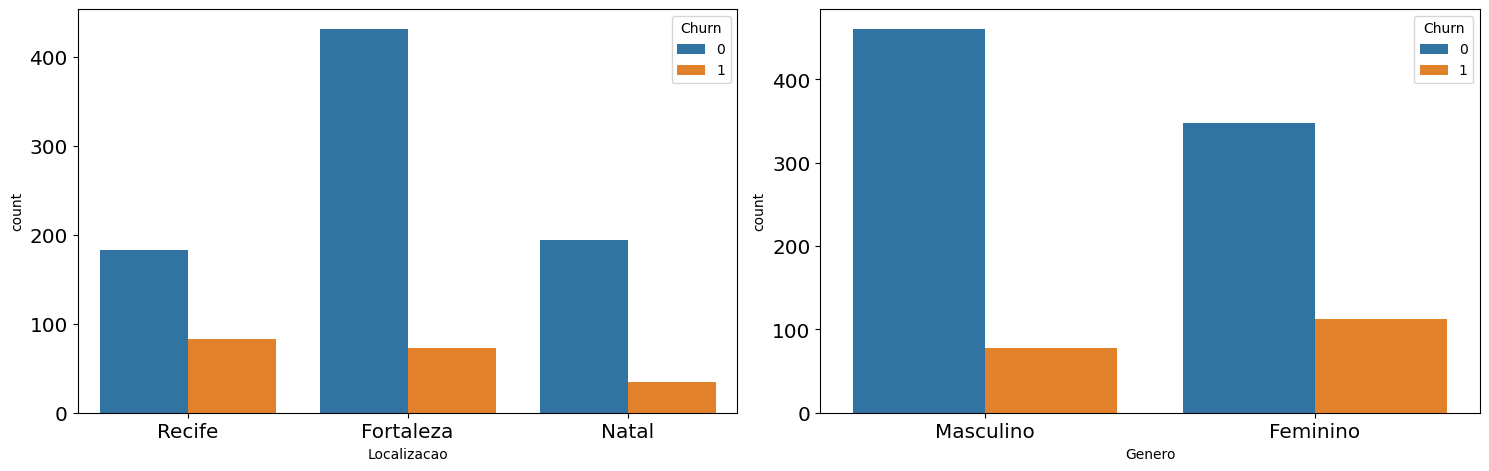

In [54]:
plt.figure(figsize = (15,9))
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df_sample, x=features[i], hue='Churn')
    plt.tight_layout()

In [25]:
def plot_with_percent(plot):
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height/2,
                '{:1.4f}'.format(100*height/total),
                ha="center", color='white') 

### Distribuição por Churn

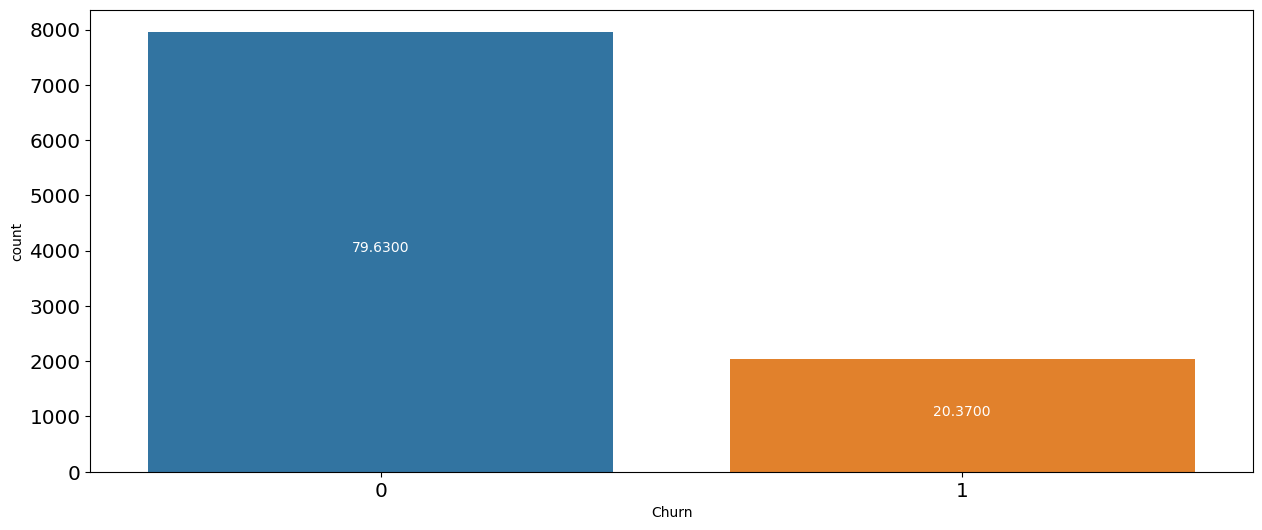

In [26]:
total = len(df)
fig, ax = plt.subplots(figsize=(15,6))
g = sns.countplot(data=df, x='Churn')
plot_with_percent(g)

Podemos notar que está desbalanceado. Temos aproximadamente 20% para Churn e 79% para não Churn nesse conjunto de dados. 

### Distribuição por genêro

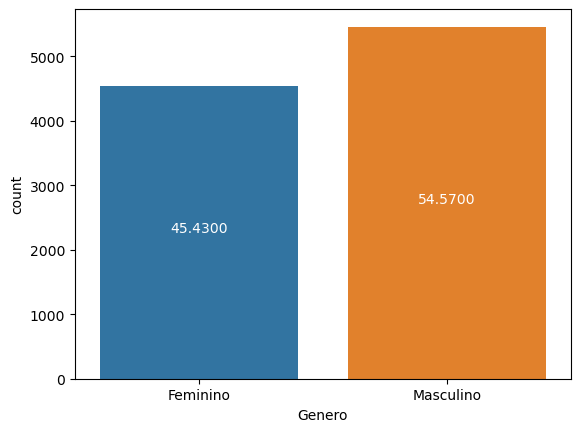

In [32]:
g = sns.countplot(data=df, x='Genero')
plot_with_percent(g)

### Distribuição por usários ativos

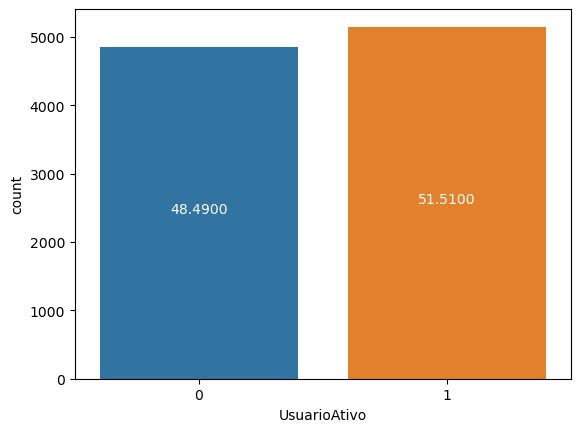

In [33]:
g = sns.countplot(data=df, x='UsuarioAtivo')
plot_with_percent(g)

### Testes de hipoteses

In [72]:
#Proporção Z-test para 2 amostras
def proportion(dfx,lista,z_base):
  # Calculating information of Sample 1:
    churn_1 = dfx[1][0]
    n_1 = dfx.sum(axis=1)[0]
    proportion_1 = n_1/df.shape[0]

  # Calculating information of Sample 2:
    churn_2 = dfx[1][1]
    n_2 = dfx.sum(axis=1)[1]
    proportion_2 = n_2/df.shape[0]

  # Creating a table with stats of samples
    df_stats = pd.DataFrame([[churn_1,n_1,proportion_1],
                           [churn_2,n_2,proportion_2]],
                           index = lista,
                           columns = ['X','n','proportion'])
    print(df_stats)
    print('\n')
    p_bar = (proportion_1*n_1+proportion_2*n_2)/df.shape[0]
    z = (proportion_1-proportion_2)/np.sqrt(p_bar*(1-p_bar)*(1/n_1+1/n_2))
    if np.absolute(z) > z_base:
        print('Como p-valor < alfa, H0 pode ser rejeitada!')
    elif np.absolute(z) < z_base:
        print("Como p-valor > alfa, não podemos rejeitar H0.")
        

        
def mean(dfx,lista):
    # Normalizing and calculating information of Sample 1:
    churn_1 = normalize(dfx,norm='l1')[0,1]
    n_1 = dfx.sum(axis=1)[0]
    sigma_1 = np.sqrt(churn_1*(1-churn_1))

    # Calculating information of Sample 2:
    churn_2 = normalize(dfx,norm='l1')[1,1]
    n_2 = dfx.sum(axis=1)[1]
    sigma_2 = np.sqrt(churn_2*(1-churn_2))

    # Creating a table with stats of samples
    df_stats = pd.DataFrame([[churn_1,n_1,sigma_1],
                            [churn_2,n_2,sigma_2]],
                            index = lista,
                            columns = ['X_bar','n','sigma'])
    print(df_stats)
    print('\n')
    z = (churn_1-churn_2)/np.sqrt(((sigma_1**2)/n_1)+((sigma_2**2)/n_2))
    print('O z-score encontrado é {};'.format(z))

### H1: A ocorrência de Churn não é igual em homens e mulheres (Churn depende do gênero)  
Pmen = probalidade do usuário que realizou churn ser homem  
Pwomen = probalidade do usuário que realizou churn ser mulher

H0: Pmen = Pwomen  
H1: Pmen != Pwomen

Assumindo que H0 seja verdade

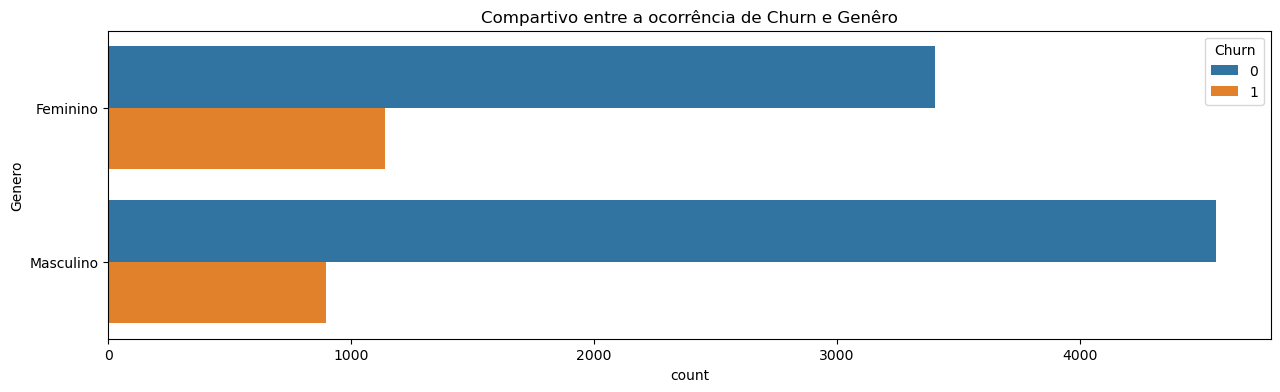

In [36]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,y='Genero',hue='Churn').set_title('Compartivo entre a ocorrência de Churn e Gênero')
plt.show()

In [37]:
df_h1 = pd.crosstab(df['Genero'],df['Churn'])
df_h1.index.name,df_h1.columns.name = (' ',' ')
df_h1

,0,1
,,
Feminino,3404,1139
Masculino,4559,898


In [79]:
#alpha = 0.05 z = 10.56
proportion(df_h1,['Feminino','Masculino'],10.56)

              X     n  proportion
Feminino   1139  4543      0.4543
Masculino   898  5457      0.5457


Como p-valor > alfa, não podemos rejeitar H0.


### H1 é falsa

### H2: Ocorrência de Churn é maior nos clientes com menor tempo

Ptm: probabilidade do cliente realizar turn com menor tempo  
PtM: probabilidade do cliente realizar turn com maior tempo  
H0: Ptm <= PtM   
H2: Ptm > PtM  

Assumindo que H0 seja verdade

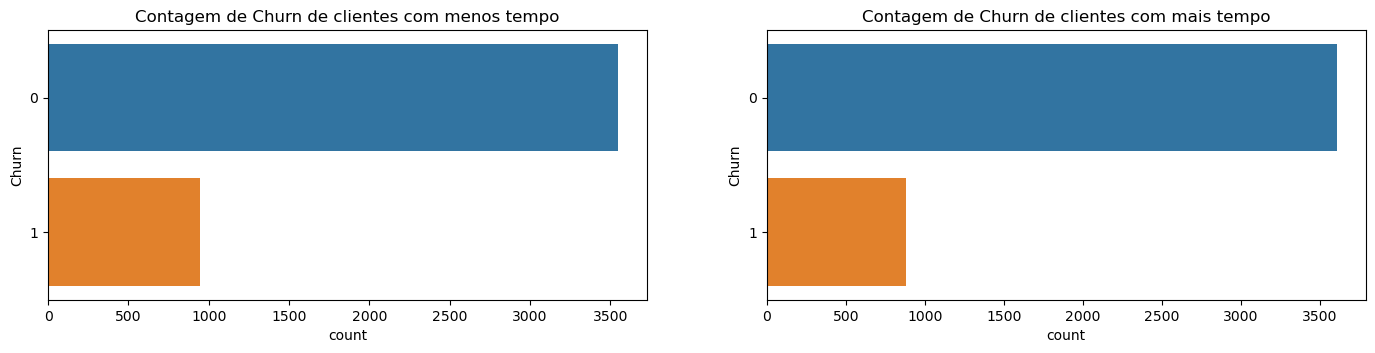

In [62]:
fig, axes = plt.subplots(1,2,figsize=(17,3.5))

sns.countplot(data=df[df['TempoCliente']<=4],y='Churn',ax=axes[0]).set_title('Quantidade de Churn de clientes com menos tempo')

sns.countplot(data=df[df['TempoCliente']>5],y='Churn',ax=axes[1]).set_title('Quantidade de Churn de clientes com mais tempo')
plt.show()

In [63]:
df_h2 = pd.DataFrame([pd.crosstab(df[df['TempoCliente']<=4]['TempoCliente'],df[df['TempoCliente']<=4]['Churn']).sum(),
                      pd.crosstab(df[df['TempoCliente']>5]['TempoCliente'],df[df['TempoCliente']>5]['Churn']).sum()],
                      index = ['Menos Tempo','Mais tempo'])
df_h2.columns.name = ' '
df_h2

,0,1
Menos Tempo,3550,944
Mais tempo,3610,884


In [77]:
# alpha = 0.05 z = 1.57
proportion(df_h2,['Menos Tempo','Mais tempo'],1.57)

               X     n  proportion
Menos Tempo  944  4494      0.4494
Mais tempo   884  4494      0.4494


Como p-valor > alfa, não podemos rejeitar H0.


### H2 é falsa

### H3: Ocorrências de Churn são maiores em clientes com mais de 40 anos   

P40: probabilidade do cliente realizar churn tendo idade menor que 40 anos  
P40+: probabilidade do cliente realizar churn tendo idade menor que 40 anos  
H0: P 40+ < = P40  
H3: P40+ > P40

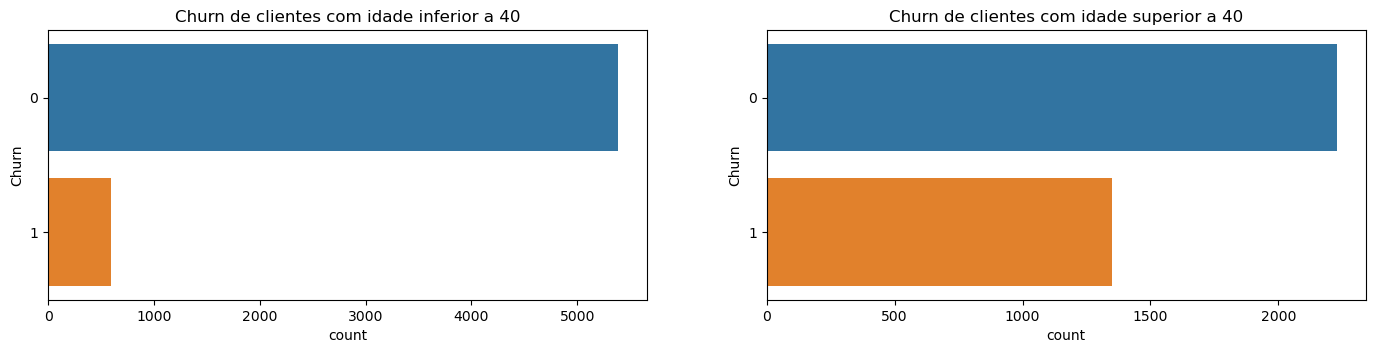

In [84]:
fig, axes = plt.subplots(1,2,figsize=(17,3.5))

sns.countplot(data=df[df['Idade']<=39],y='Churn',ax=axes[0]).set_title('Quantidade de Churn de clientes com idade inferior a 40')

sns.countplot(data=df[df['Idade']>40],y='Churn',ax=axes[1]).set_title('Quantidade de Churn de clientes com idade superior a 40')
plt.show()

In [85]:
df_h3 = pd.DataFrame([pd.crosstab(df[df['Idade']<=39]['Idade'],df[df['Idade']<=39]['Churn']).sum(),
                      pd.crosstab(df[df['Idade']>40]['Idade'],df[df['Idade']>40]['Churn']).sum()],
                      index = ['Menos de 40','Mais de 40'])
df_h3.columns.name = ' '
df_h3

,0,1
Menos de 40,5390,597
Mais de 40,2230,1351


In [88]:
# alpha = 0.05 z = -30.91
proportion(df_h3,['Menos 40','Mais 40'],-30.91)

             X     n  proportion
Menos 40   597  5987      0.5987
Mais 40   1351  3581      0.3581


Como p-valor < alfa, H0 pode ser rejeitada!


### H3 é verdadeira

### H4: Ocorrências de Churn é maior em clientes com mais de 2 produtos  
P2: probabilidade do cliente realizar churn tendo até 2 produtos   
P2+: probabilidade do cliente realizar churn tendo mais de 2 produtos  
H0: P2+ <= P2  
H4: P2+ > P2

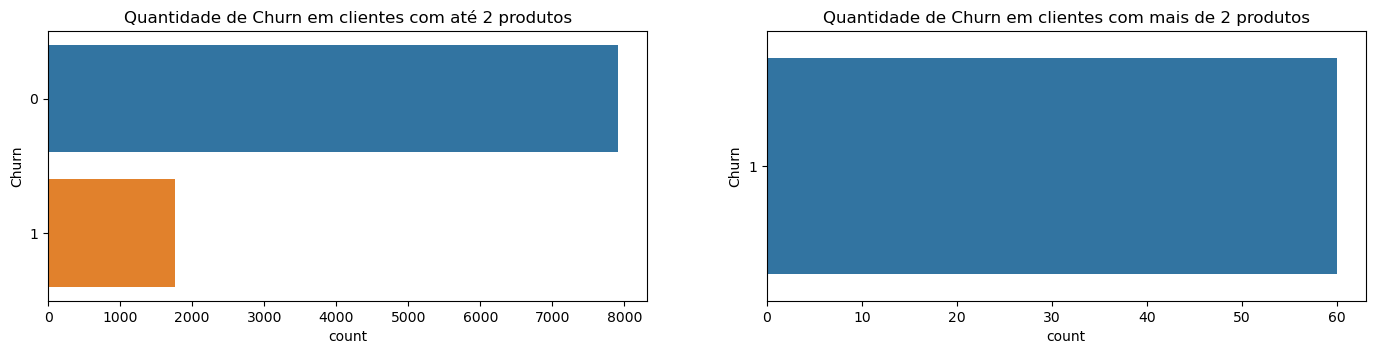

In [92]:
fig, axes = plt.subplots(1,2,figsize=(17,3.5))

sns.countplot(data=df[df['Produtos']<=2],y='Churn',ax=axes[0]).set_title('Quantidade de Churn em clientes com até 2 produtos')

sns.countplot(data=df[df['Produtos']>2],y='Churn',ax=axes[1]).set_title('Quantidade de Churn em clientes com mais de 2 produtos')
plt.show()

In [95]:
df_h4 = pd.DataFrame([pd.crosstab(df[df['Produtos']<=2]['Produtos'],df[df['Idade']<=39]['Churn']).sum(),
                      pd.crosstab(df[df['Produtos']>2]['Produtos'],df[df['Idade']>40]['Churn']).sum()],
                      index = ['Menos de 2','Mais de 2'])
df_h4.columns.name = ' '
df_h4

,0,1
Menos de 2,5359,517
Mais de 2,12,190


In [98]:
# alpha = 0.05 z = -50.04
# mean(df_h4,['Menos de 2','Mais de 2'])
proportion(df_h4,['Menos 40','Mais 40'],-50.04)

            X     n  proportion
Menos 40  517  5876      0.5876
Mais 40   190   202      0.0202


Como p-valor < alfa, H0 pode ser rejeitada!


### H4 é verdadeira

### Previsão

In [102]:
data = df[['Idade','TempoCliente', 'Saldo', 'Produtos', 'TemCartao', 'UsuarioAtivo','Salario']]
label = df['Churn']

In [104]:
## Correlação

# fig, ax = plt.subplots(figsize=(6, 6))
# sns.heatmap(data.corr(), vmin=0, ax=ax)

In [107]:
x_train, x_valid, y_train, y_valid = train_test_split(data, label, test_size=0.3)

In [108]:
modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)

modelGB = GradientBoostingClassifier()
modelGB.fit(x_train, y_train)

GradientBoostingClassifier()

In [109]:
predictLR = modelLR.predict(x_valid)
print('Logistic Regression: \n', classification_report(predictLR, y_valid))
print('Logistic Regression Accuracy: ', accuracy_score(predictLR, y_valid))

predictRF = modelRF.predict(x_valid)
print('Random Forest Classifier : \n', classification_report(predictRF, y_valid))
print('Random Forest Classifier Accuracy: ', accuracy_score(predictRF, y_valid))

predictGB = modelGB.predict(x_valid)
print('Gradient Boost Classifier : \n', classification_report(predictGB, y_valid))
print('Gradient Boost Classifier Accuracy: ', accuracy_score(predictGB, y_valid))

Logistic Regression: 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89      3000
           1       0.00      0.00      0.00         0

    accuracy                           0.80      3000
   macro avg       0.50      0.40      0.45      3000
weighted avg       1.00      0.80      0.89      3000

Logistic Regression Accuracy:  0.8023333333333333
Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      2612
           1       0.45      0.69      0.54       388

    accuracy                           0.85      3000
   macro avg       0.70      0.78      0.73      3000
weighted avg       0.88      0.85      0.86      3000

Random Forest Classifier Accuracy:  0.8503333333333334
Gradient Boost Classifier : 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      2662
           1       0.44      0.77      0.56       

/Users/wendel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wendel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wendel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusão

Nesse caso a Accuracy não é uma métrica muito boa para avaliar nossos modelos, pois ela mede a exatidão geral do modelo, e, como o conjunto de dados está desbalanceado, acarreta em um aumento que não reflete no nosso resultado positivo. Portanto, é bom escolhermos outras métricas que estão disponíveis, como Precision e Recall.

Precision é a porcentagem de predições corretas para o rótulo dentre o total que foi previsto com esse rótulo, ou seja, quão bem o modelo prevê o rótulo. E o Recall é a porcentagem de predições corretas para o rótulo dentre o total de entradas que realmente possuem esse rótulo, ou seja, quão bem o modelo prevê o rótulo dado que este é o rótulo correto.

Podemos notar que **os modelos obtiveram resultados parecidos principalmente para a previsão de não churn**, isso se dá devido ao desbalancemanto de churn e não churn. Caso o conjunto de dados seja muito grande o Gradient Boost se mostra melhor em performance.